<a href="https://colab.research.google.com/github/JotaPMendes/cursos/blob/main/filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/JotaPMendes/cursos.git

Cloning into 'cursos'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), done.


In [2]:
!git config --global user.email "jotapsmendes@gmail.com"
!git config --global user.name "JotaPMendes"

In [ ]:
import pandas as pd

uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri_filmes)

filmes.columns = ['filmes_id', 'titulo', 'generos']

filmes.head()

,filmes_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis = 1)
dados_dos_filmes.head()

,filmes_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

In [ ]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 3)
modelo.fit(generos_escalados)
print('Grupos {}' .format(modelo.labels_))


Grupos [0 0 1 ... 1 0 1]


In [ ]:
print(generos.columns)
print(modelo.cluster_centers_)


Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.76435296  1.62770407  1.26101069  1.14841702 -0.13846894
  -0.31462227 -0.21094231 -0.58170462  0.993449   -0.09492563 -0.23904634
   0.57124651  0.18145075 -0.1575278  -0.27916393  0.6803341  -0.25077064
  -0.05491888 -0.05350577]
 [ 0.03718158 -0.3196422  -0.29638571 -0.2200747  -0.18224451  0.24905694
  -0.27491431  0.13342489  0.10242285 -0.18142594 -0.08959578 -0.10824969
  -0.11251862  0.02284971 -0.2201504   0.18958695 -0.19496239 -0.48661325
   0.06061937  0.02889227]
 [-0.05917995  0.34443011 -0.27144974 -0.23524466 -0.26177995 -0.56224645
   0.92116332 -0.21328016  0.1061589  -0.16428849  0.29531782  0.43675484
  -0.07303529 -0.17640903  0.67695946 -0.31627997  0.07241632  1.43369349
 

In [ ]:
grupos = pd.DataFrame(modelo.cluster_centers_,
             columns = generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.764353,1.627704,1.261011,1.148417,-0.138469,-0.314622,-0.210942,-0.581705,0.993449,-0.094926,-0.239046,0.571247,0.181451,-0.157528,-0.279164,0.680334,-0.250771,-0.054919,-0.053506
1,0.037182,-0.319642,-0.296386,-0.220075,-0.182245,0.249057,-0.274914,0.133425,0.102423,-0.181426,-0.089596,-0.108250,-0.112519,0.022850,-0.220150,0.189587,-0.194962,-0.486613,0.060619,0.028892
2,-0.059180,0.344430,-0.271450,-0.235245,-0.261780,-0.562246,0.921163,-0.213280,0.106159,-0.164288,0.295318,0.436755,-0.073035,-0.176409,0.676959,-0.316280,0.072416,1.433693,-0.123208,-0.041152


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e19f7c9e8>,
      dtype=object)

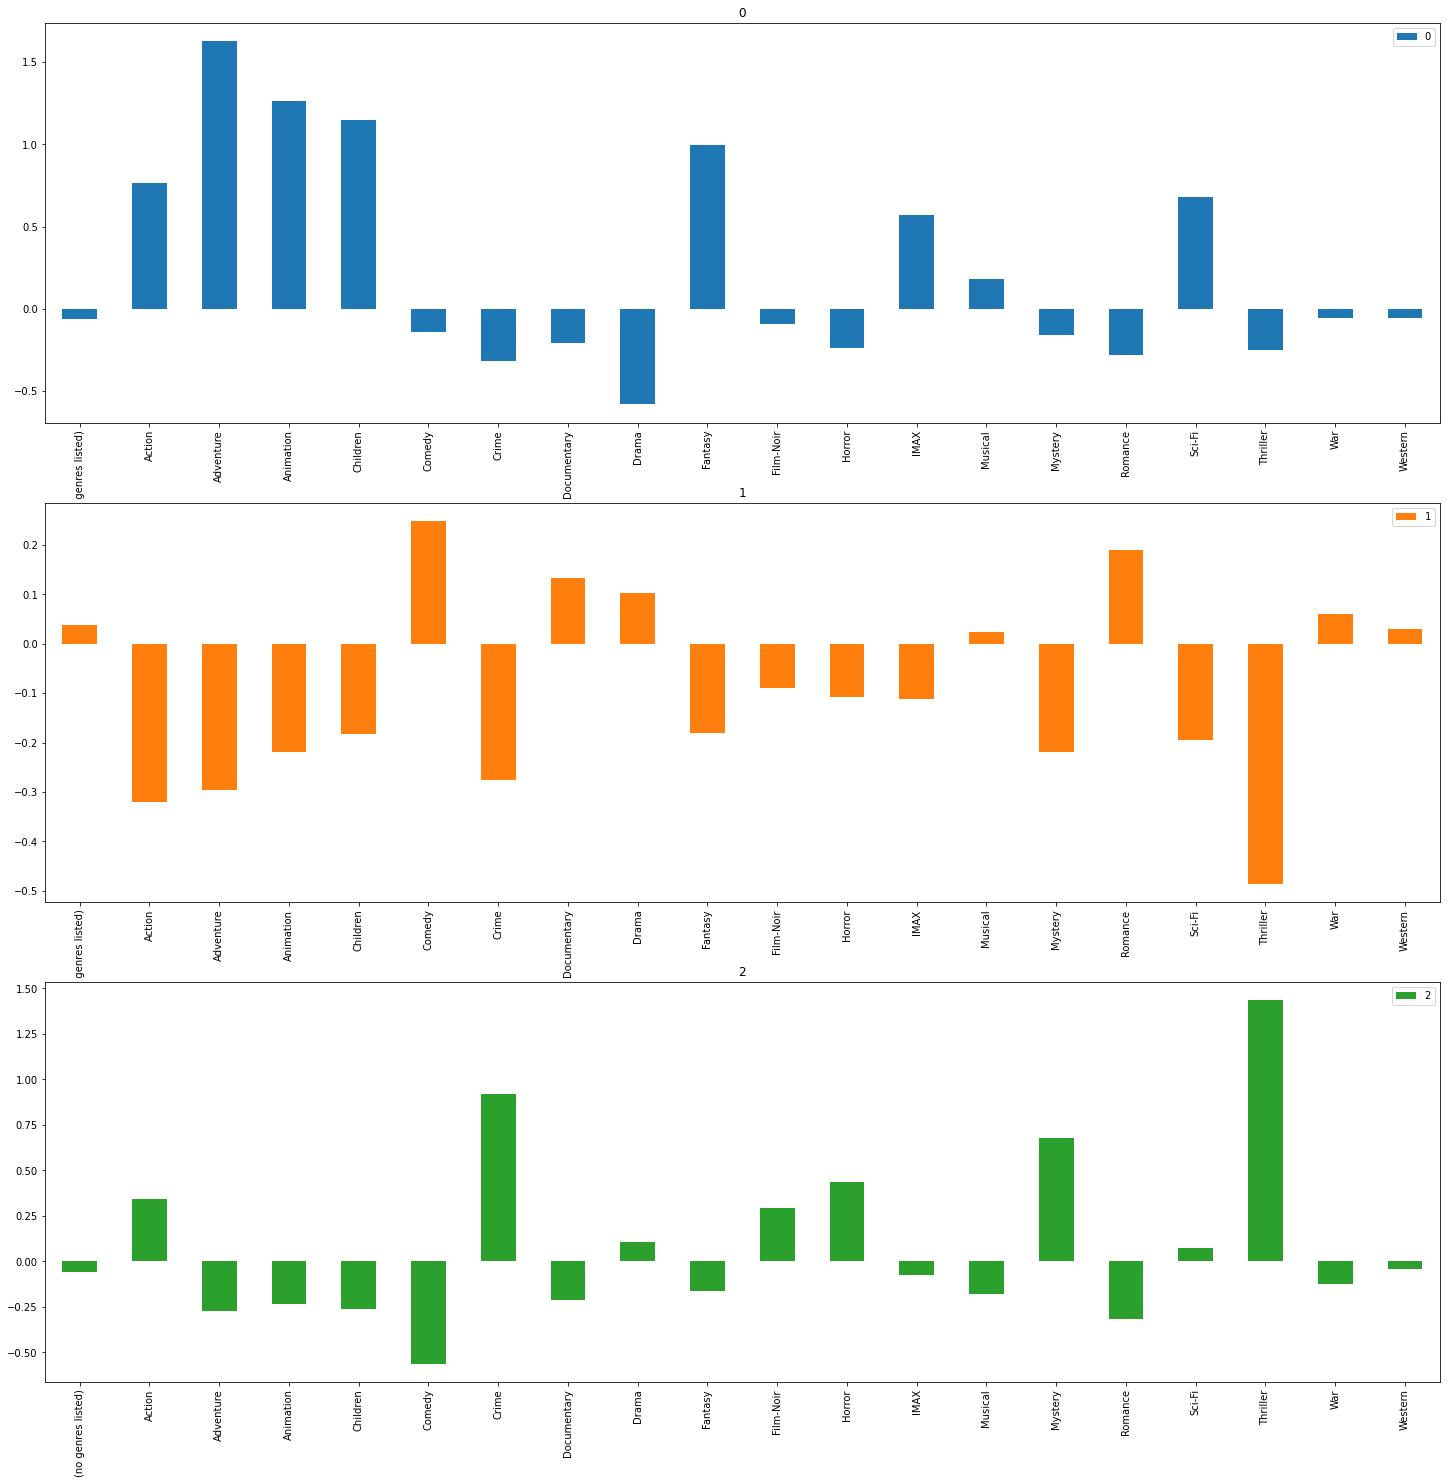

In [ ]:

grupos.transpose().plot.bar(subplots = True,
                figsize = (25, 25),
                sharex = False)

In [ ]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filmes_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7549,85259,Winnie the Pooh and the Honey Tree (1966),Animation|Children,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4723,7045,"Witches, The (1990)",Children|Fantasy,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4425,6537,Terminator 3: Rise of the Machines (2003),Action|Adventure|Sci-Fi,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7765,91485,"Expendables 2, The (2012)",Action|Adventure,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1390,1907,Mulan (1998),Adventure|Animation|Children|Comedy|Drama|Musi...,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
9537,172583,Investigation Held by Kolobki (1986),Animation,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5010,7757,Jason and the Argonauts (1963),Action|Adventure|Fantasy,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2902,3889,Highlander: Endgame (Highlander IV) (2000),Action|Adventure|Fantasy,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6886,63113,Quantum of Solace (2008),Action|Adventure|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
671,885,Bogus (1996),Children|Drama|Fantasy,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao


array([[ 53.324924 , -46.24972  ],
       [-36.020615 ,  69.71038  ],
       [  4.2756944,  43.474407 ],
       ...,
       [-18.586845 ,   2.9173326],
       [ 42.980476 , -27.576794 ],
       [ 18.85422  , -15.744999 ]], dtype=float32)

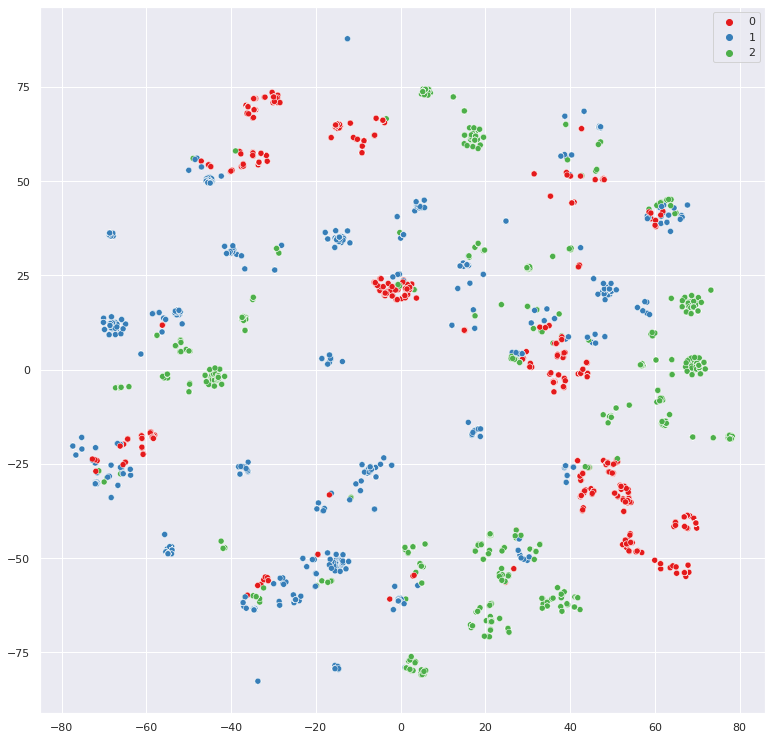

In [ ]:
import seaborn as sns

sns.set(rc = {'figure.figsize' : (13, 13)})

sns.scatterplot(x = visualizacao[:, 0],
                y = visualizacao[:, 1],
                hue = modelo.labels_,
                palette = sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e17717c88>,
      dtype=object)

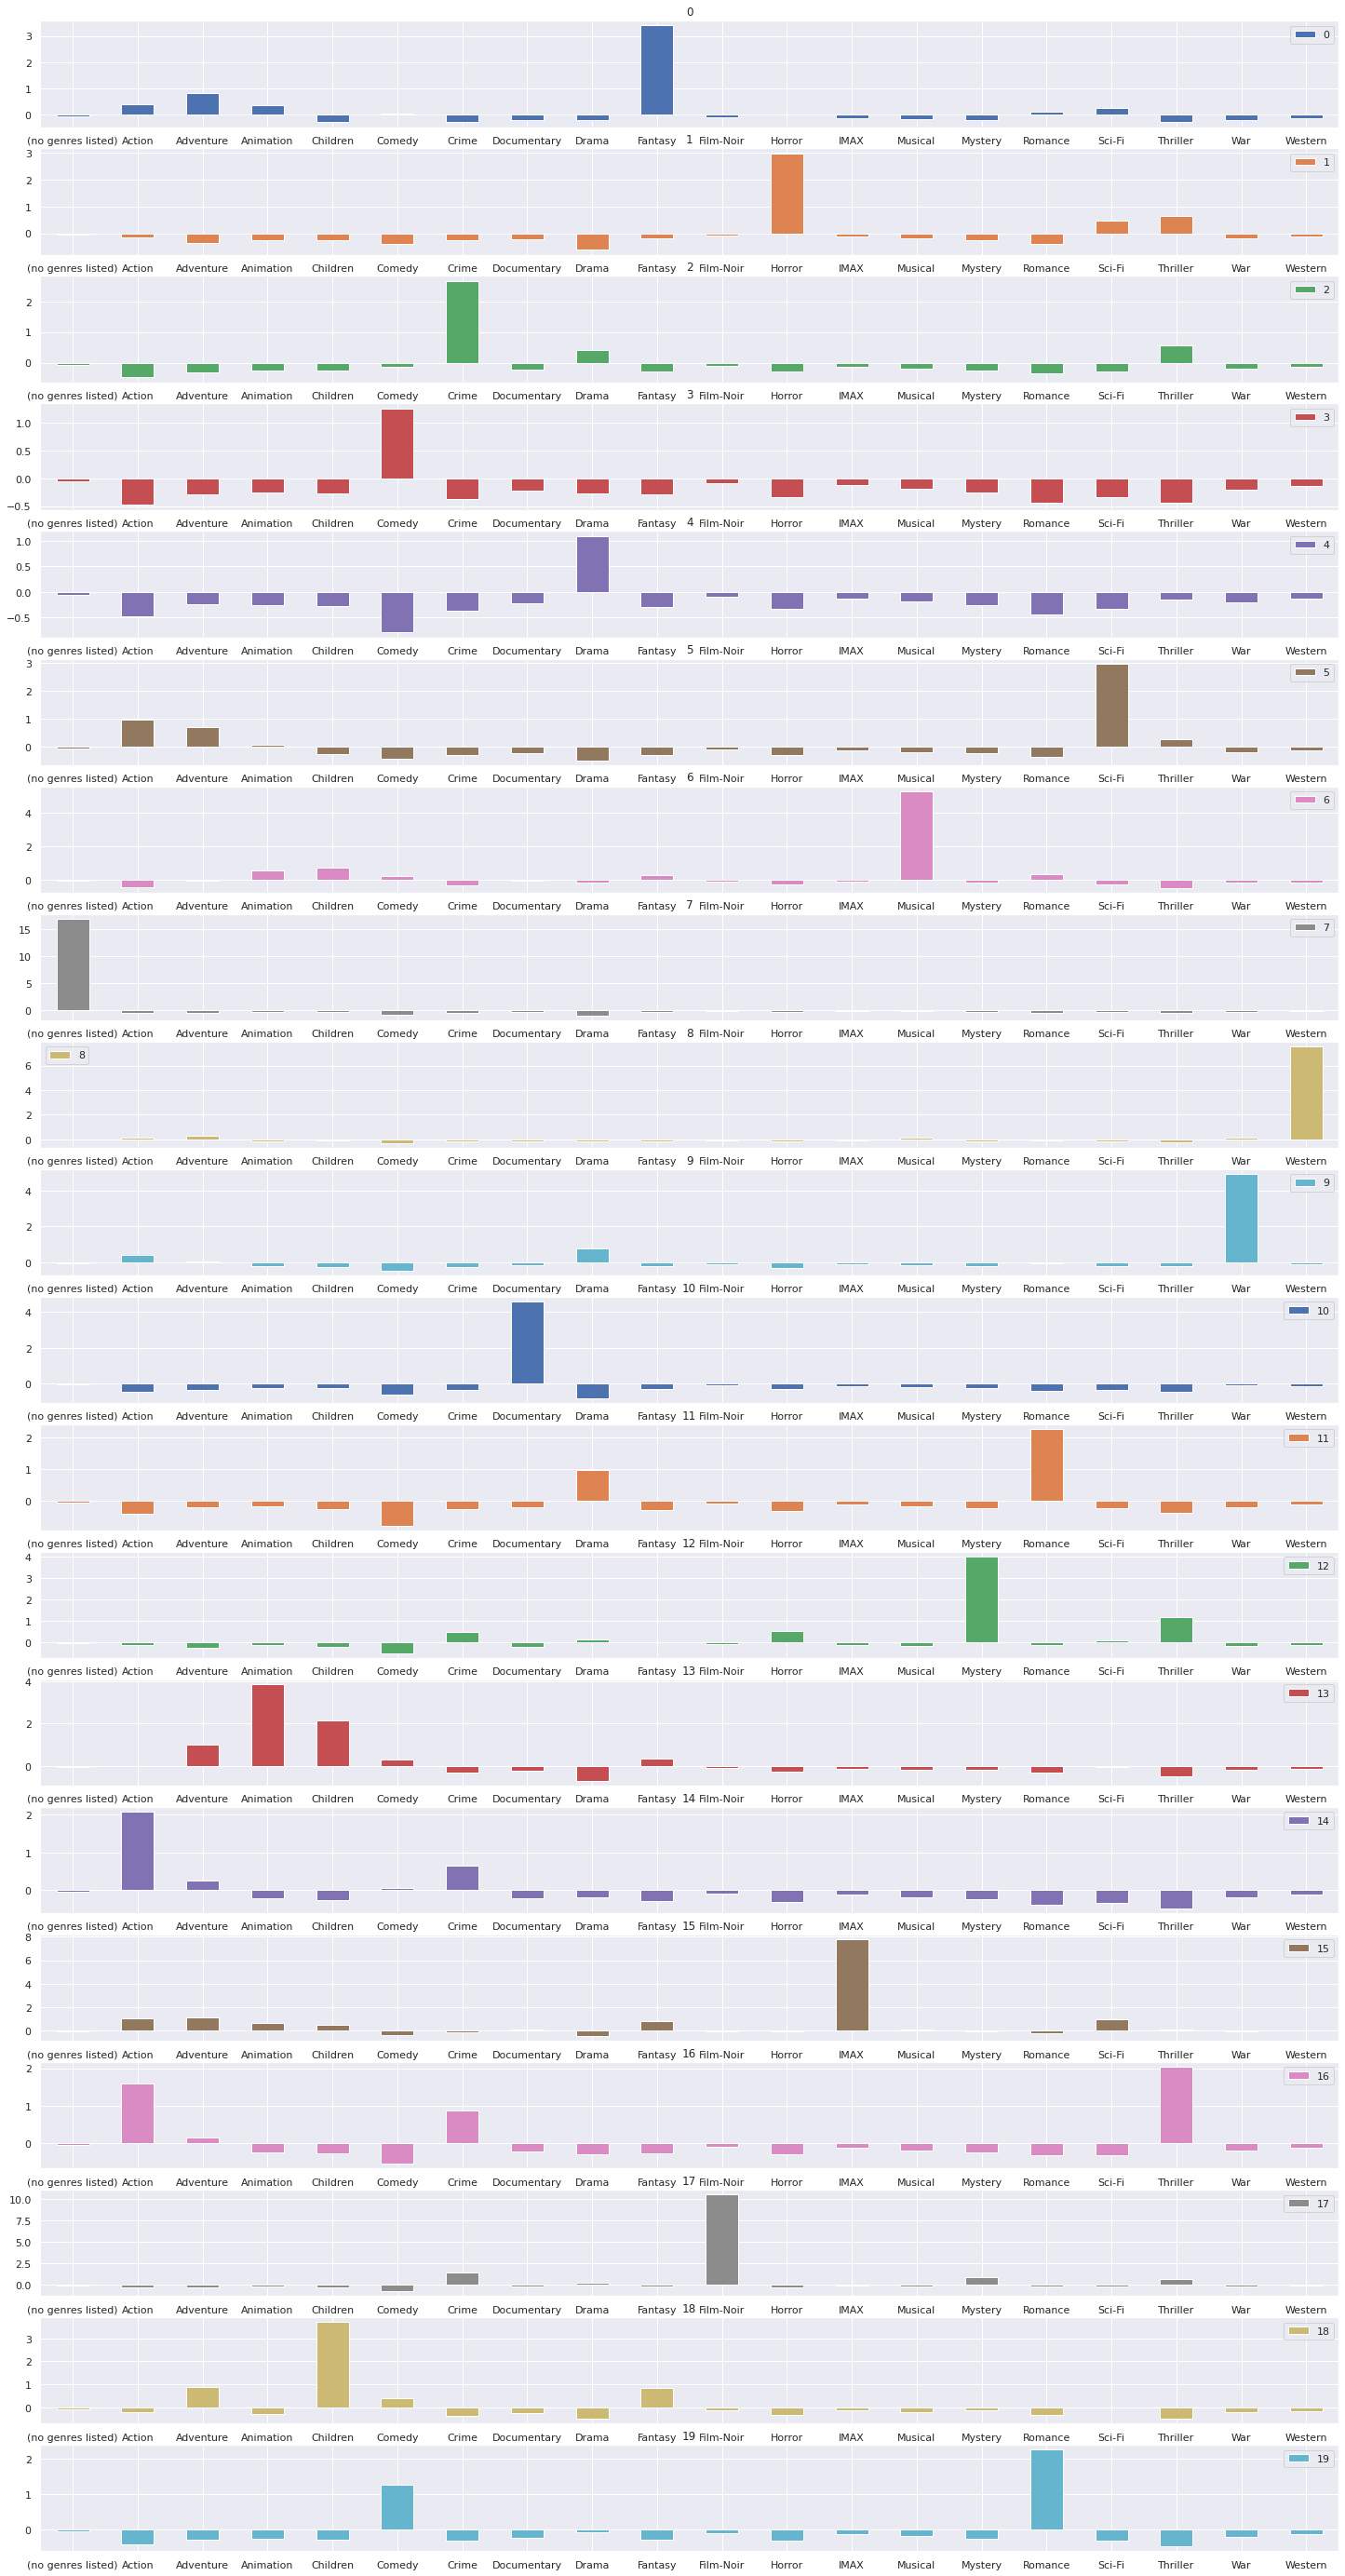

In [ ]:
modelo = KMeans(n_clusters = 20)

modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_,
             columns = generos.columns)
grupos.transpose().plot.bar(subplots = True,
                figsize = (25, 50),
                sharex = False,
                rot = 0)

In [ ]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filmes_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9645,179819,Star Wars: The Last Jedi (2017),Action|Adventure|Fantasy|Sci-Fi,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7945,95843,Goodbye Charlie (1964),Comedy|Fantasy|Romance,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
169,201,Three Wishes (1995),Drama|Fantasy,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
5842,32456,"Pom Poko (a.k.a. Raccoon War, The) (Heisei tan...",Animation|Comedy|Drama|Fantasy,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
5983,36525,Just Like Heaven (2005),Comedy|Fantasy|Romance,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
5618,27134,Dark Portals: The Chronicles of Vidocq (Vidoc...,Action|Crime|Fantasy,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5737,30810,"Life Aquatic with Steve Zissou, The (2004)",Adventure|Comedy|Fantasy,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1682,2263,"Seventh Sign, The (1988)",Drama|Fantasy|Thriller,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
3582,4911,Jabberwocky (1977),Adventure|Comedy|Fantasy,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4742,7064,Beauty and the Beast (La belle et la bête) (1946),Drama|Fantasy,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters = numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]


In [ ]:
kmeans(20, generos_escalados)

[20, 55300.692712717755]

In [ ]:
kmeans(3, generos_escalados)

[3, 166081.22237436744]

In [ ]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179664.9990790031],
 [3, 168655.17702194562],
 [4, 157778.75464117786],
 [5, 146693.57143919353],
 [6, 137385.61965726106],
 [7, 128589.2355681488],
 [8, 118506.61862053252],
 [9, 111443.50281679128],
 [10, 103926.00083857053],
 [11, 97233.20930998927],
 [12, 86092.18155247121],
 [13, 79104.50399667911],
 [14, 75146.72171172148],
 [15, 68886.37753211336],
 [16, 63723.69315086521],
 [17, 61526.07420552054],
 [18, 58557.48745977571],
 [19, 56912.26123218252],
 [20, 54284.675297219015],
 [21, 53772.67525636208],
 [22, 51606.04347887486],
 [23, 50494.966146088824],
 [24, 49686.907850936965],
 [25, 47789.06937855042],
 [26, 47388.272611021464],
 [27, 45800.512914250234],
 [28, 44562.11489374684],
 [29, 43937.910144223904],
 [30, 42520.73966243789],
 [31, 41844.339235554464],
 [32, 40994.63063222373],
 [33, 39609.73185975653],
 [34, 39285.1098171048],
 [35, 38688.841776439745],
 [36, 38259.16430332135],
 [37, 36658.92343391565],
 [38, 36502.77594645239],
 [39, 35719.9669

In [ ]:
resultado = pd.DataFrame(resultado,
             columns = ('grupos', 'inertia'))
resultado

,grupos,inertia
0,1,194840.000000
1,2,179664.999079
2,3,168655.177022
3,4,157778.754641
4,5,146693.571439
5,6,137385.619657
6,7,128589.235568
7,8,118506.618621
8,9,111443.502817
9,10,103926.000839


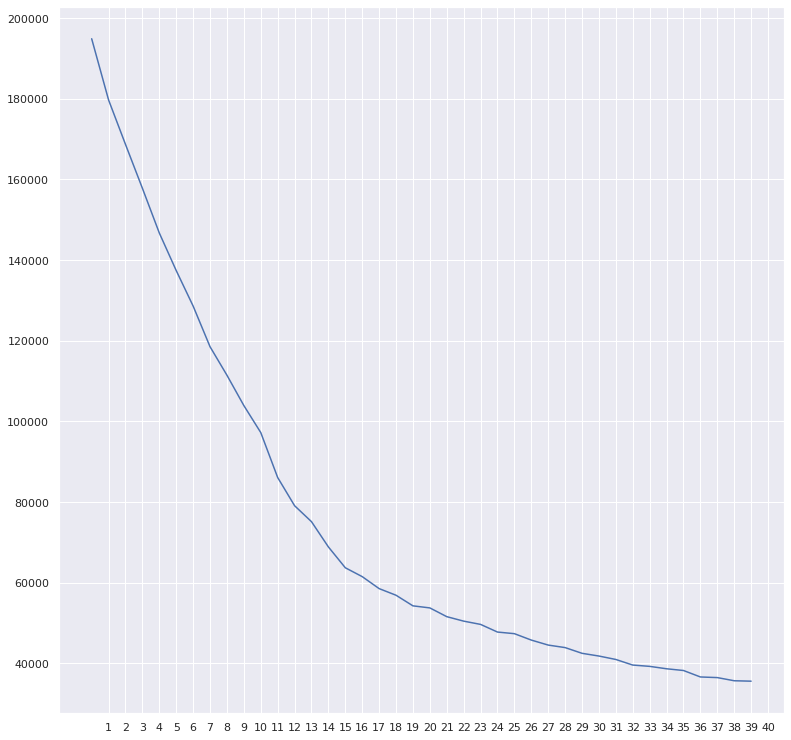

In [ ]:
resultado.inertia.plot(xticks = resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e1696aa58>,
      dtype=object)

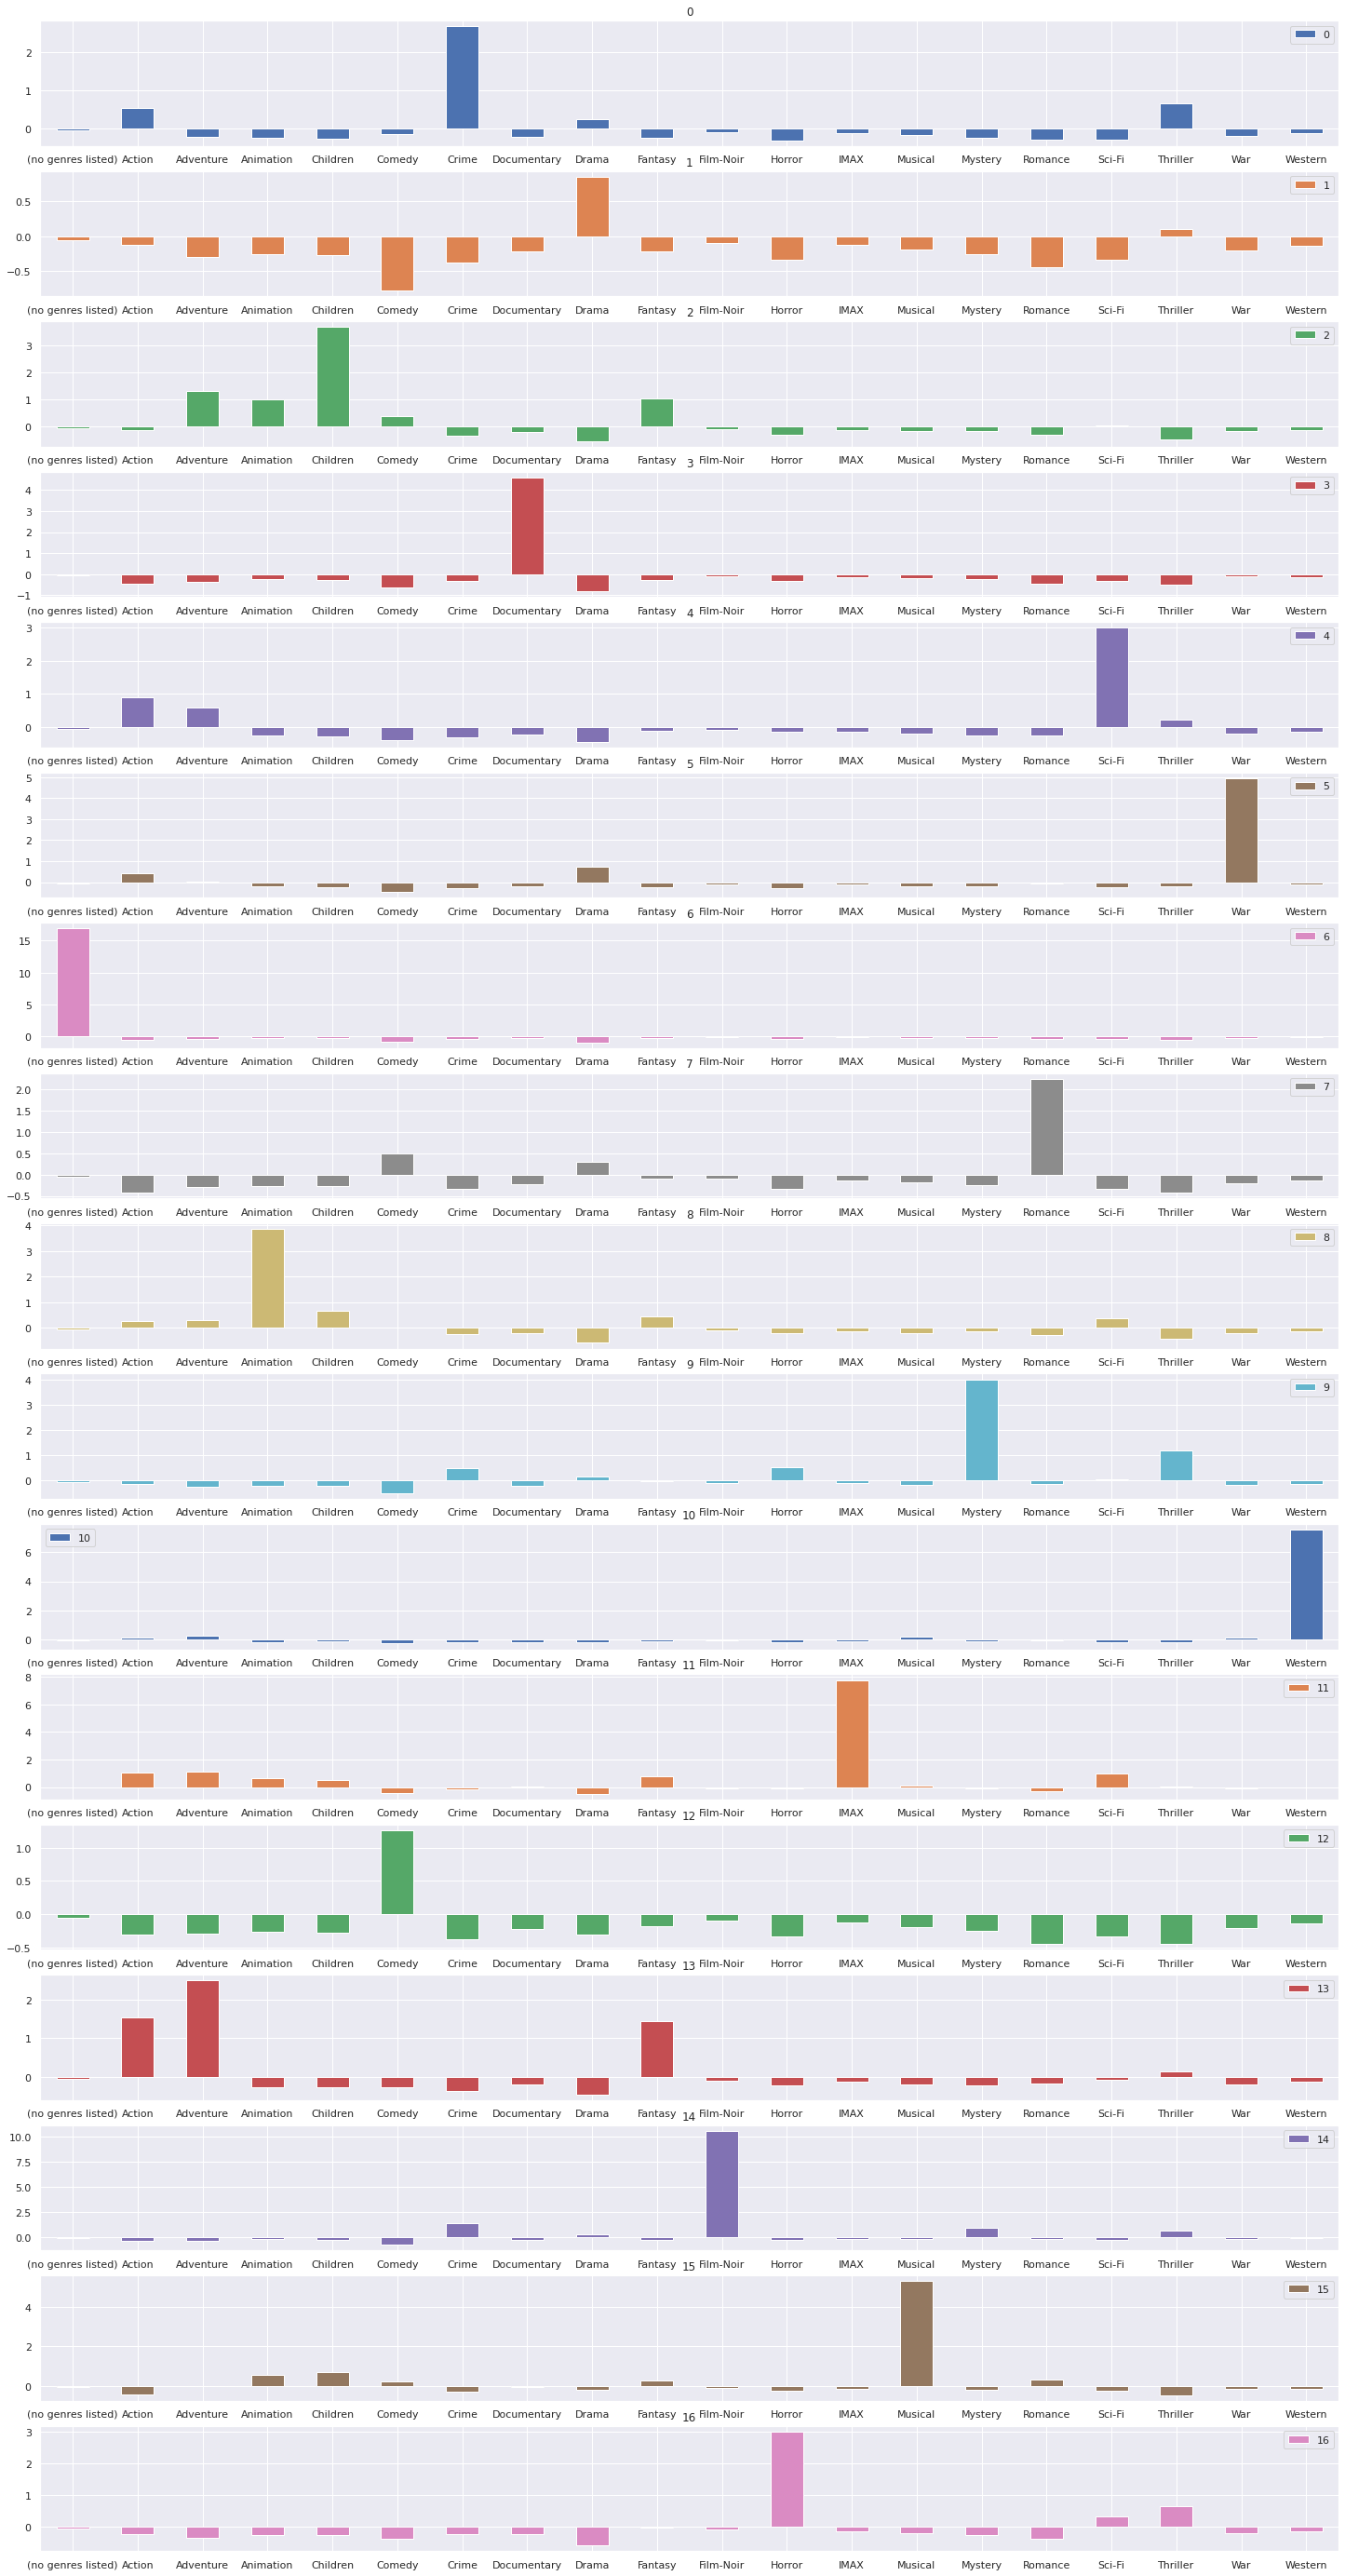

In [ ]:
modelo = KMeans(n_clusters = 17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns = generos.columns)
grupos.transpose().plot.bar(subplots = True,
                figsize = (25, 50),
                sharex = False,
                rot = 0)

In [ ]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filmes_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4638,6932,Shattered Glass (2003),Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2763,3701,Alien Nation (1988),Crime|Drama|Sci-Fi|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0
4436,6552,Dirty Pretty Things (2002),Crime|Drama|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
5088,8016,"Getaway, The (1972)",Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
645,832,Ransom (1996),Crime|Thriller,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
928,1227,Once Upon a Time in America (1984),Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
5498,26375,Silver Streak (1976),Action|Comedy|Crime,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2816,3764,F/X2 (a.k.a. F/X 2 - The Deadly Art of Illusio...,Action|Crime|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1394,1912,Out of Sight (1998),Comedy|Crime|Drama|Romance|Thriller,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0
8057,99005,Fire with Fire (2012),Action|Crime|Drama,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering(n_clusters = 17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [ ]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 19.258425 ,  62.150303 ],
       [-37.766212 ,  44.214478 ],
       [ 44.755344 ,   3.7696474],
       ...,
       [ 17.405218 ,   9.497283 ],
       [-48.017868 , -14.998943 ],
       [-20.139011 , -10.003494 ]], dtype=float32)

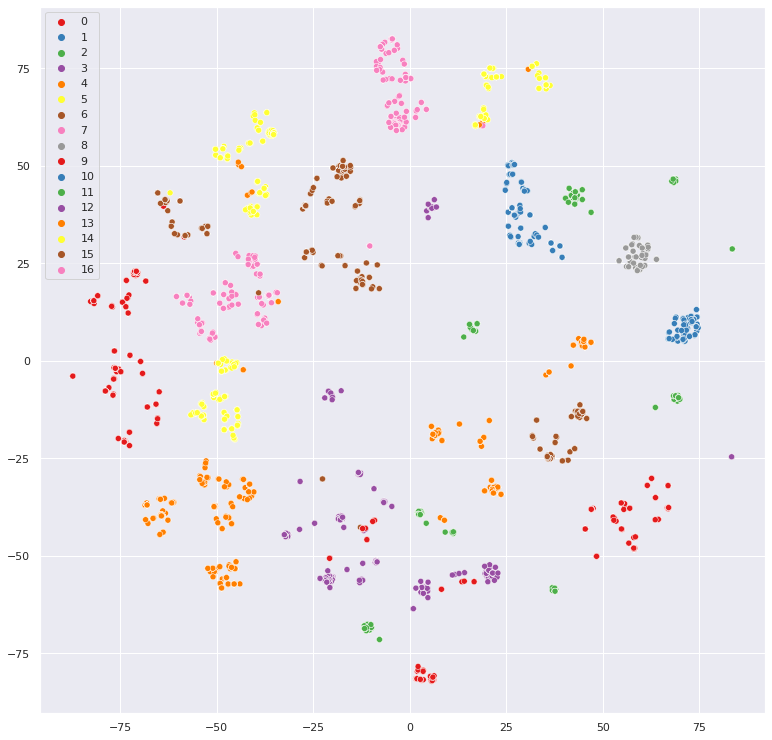

In [ ]:
sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:, 1],
                hue=grupos,
                palette=sns.color_palette('Set1', 17))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e15d5b470>,
      dtype=object)

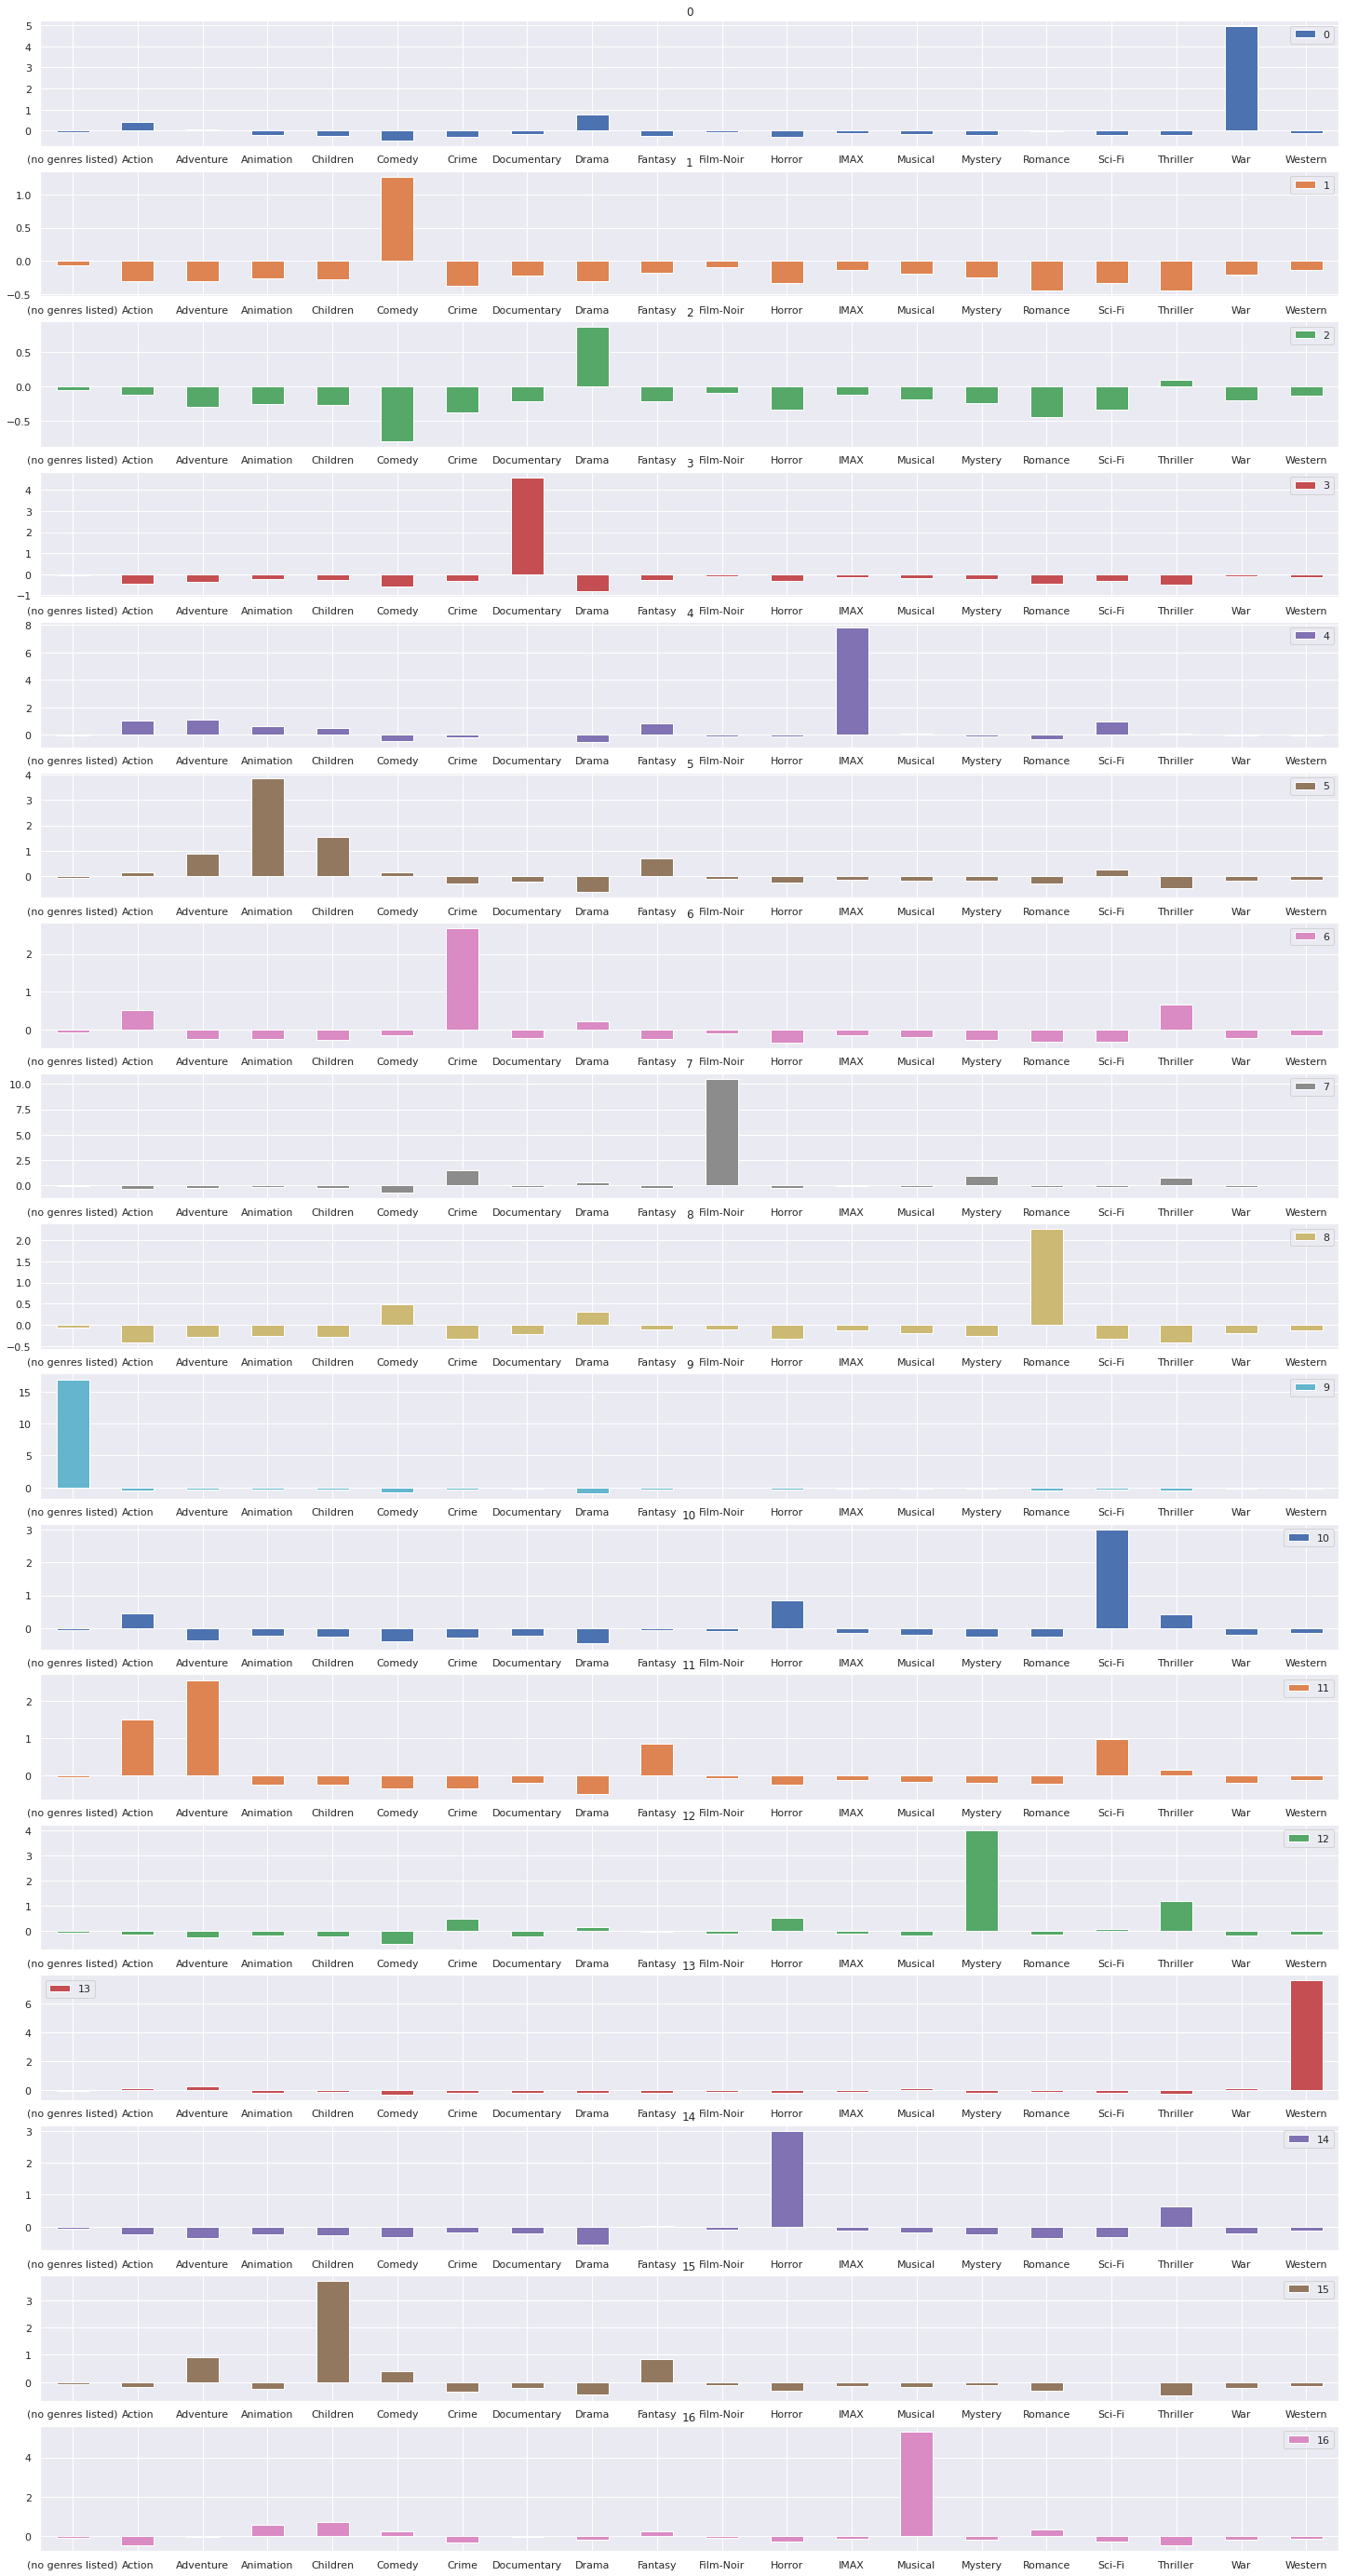

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

modelo = KMeans(n_clusters = 17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns = generos.columns)
grupos.transpose().plot.bar(subplots = True,
                figsize = (25, 50),
                sharex = False,
                rot = 0)

In [ ]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 1.        ,  2.        ,  2.41910952,  2.        ],
       [ 8.        , 17.        ,  2.87947393,  3.        ],
       [ 6.        , 18.        ,  3.28985826,  4.        ],
       [14.        , 19.        ,  3.70049444,  5.        ],
       [10.        , 20.        ,  3.84707125,  6.        ],
       [11.        , 21.        ,  3.94011684,  7.        ],
       [15.        , 22.        ,  4.38570568,  8.        ],
       [12.        , 23.        ,  4.6455274 ,  9.        ],
       [ 5.        , 24.        ,  4.67955588, 10.        ],
       [ 3.        , 25.        ,  5.1427482 , 11.        ],
       [ 0.        , 26.        ,  5.22424647, 12.        ],
       [16.        , 27.        ,  5.81741832, 13.        ],
       [13.        , 28.        ,  7.84661998, 14.        ],
       [ 4.        , 29.        ,  8.15821537, 15.        ],
       [ 7.        , 30.        , 10.81653889, 16.        ],
       [ 9.        , 31.        , 17.06135489, 17.        ]])

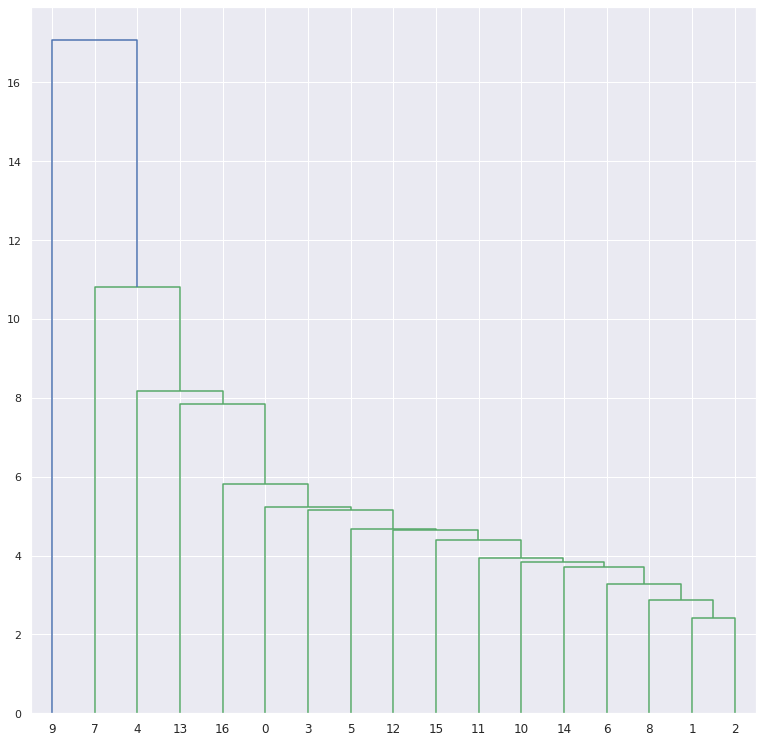

In [ ]:
dendrograma = dendrogram(matriz_de_distancia)